# Jupyter Tutorial (part 2)

In this part of the Jupyter tutorial, we will show how to use Jupyter code cells to implement interactive and/or animated figures. Such figures allows Jupyter notebooks to go beyond traditional "static" course notes. For instance, a student can use sliders to change the parameters of a plotted curve, and the curve will be automatically updated to display the effects of the change.

The material we will cover is as follows:

* Creating interactive plots using the `FloatSlider` widget.
* Other widget types (integer sliders, toggle buttons, etc.).
* Creating 3D plots.
* Creating animated plots.

## Interactive plots with sliders

The following code cell contains a simple example of an interactive plot.  The figure shows the graph of $y = \cos(x + \phi)$.  There is a slider, which you can drag to change the value of $\phi$.  The graph is updated automatically.

As before, you need to run the code cell to enable the interactive graph; select it and type `Ctrl-Enter`, or choose the `Cell &rightarrow; Run Cells` menu item, or the "run" toolbar button.

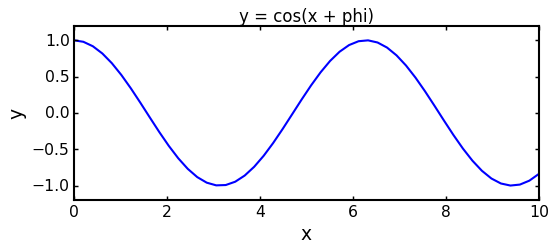

In [1]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

## Definition of the plot_cos function, our "callback function".
def plot_cos(phi):
    ## Plot parameters
    xmin, xmax, nx = 0.0, 10.0, 50
    ymin, ymax     = -1.2, 1.2

    ## Plot the figure
    x = linspace(xmin, xmax, nx)
    y = cos(x + phi)
    plt.figure(figsize=(8,3))
    plt.plot(x, y, linewidth=2)

    ## Set up the figure axes, etc.
    plt.title("y = cos(x + phi)")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('x')
    plt.ylabel('y')

## Generate our user interface.
interact(plot_cos, phi=FloatSlider(min=-3.2, max=3.2, step=0.2, value=0.0));

Let's go over the key steps in the above program:

* First, we set up inline plotting, and import the modules required by the rest of the program, as [discussed in part 1 of the tutorial](jupyter_tutorial_01.ipynb#basic_plotting).  This time, in addition to the `scipy` and `matplotlib.pyplot` modules, we also import the `ipywidgets` module, which implements interactive user interfaces ("widgets") for Jupyter.  Specifically, we import `interact` and `FloatSlider`, which we'll need later.
* The rest of the program consists of two pieces: a **callback function** for the user interface, and a **generator** for the interface. The callback function, in this case named `plot_cos`, does the actual work of generating the plot once the user has provided the necessary input(s) (i.e., the value of $\phi$ to use).  The interface generator specifies how the user's input is obtained (i.e., using an interactive slider), and how that data is passed to the callback function.
* The `plot_cos` function, our callback function, takes one input named phi, which specifies the phase shift in $y = \cos(x + \phi)$.  Using this, it creates a Matplotlib plot of $y$ versus $x$.
* The interface generator consists of a call to the function named [`interact`](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html), which was imported from the `ipywidgets` module.  The first input to `interact` specifies what callback function to use&mdash;in this case, we specify the function `plot_cos`, which we've just defined.  After that, the remaining inputs to the `interact` function should specify how the callback function's input(s) should be obtained.
* In this case, there is just one input, which is used to specify how to obtain `phi` (the sole input to `plot_cos`). In order to access `phi` using an interactive slider, we invoke the `FloatSlider` class, which was also imported from the `ipywidgets` module.  The inputs to FloatSlider are fairly self-explanatory: they specify the minimum and maximum values of the slider, the numerical step, and the initial (default) value.

Here is a slightly different way to write the program:

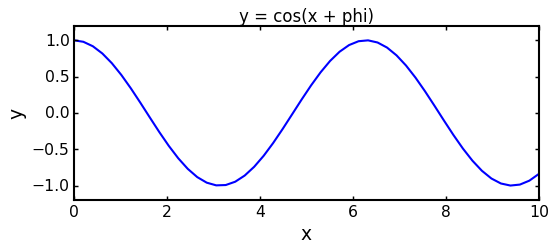

In [2]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display

def interact_cos():
    ## Plot parameters
    xmin, xmax, nx = 0.0, 10.0, 50
    ymin, ymax = -1.2, 1.2
    pmin, pmax, pstep, pinit = -3.2, 3.2, 0.2, 0.0
    
    ## Set up the plot data
    x     = linspace(xmin, xmax, nx)
    fig   = plt.figure(figsize=(8,3))
    line, = plt.plot([], [], linewidth=2) # Initialize curve to empty data.

    ## Set up the figure axes, etc.
    plt.title("y = cos(x + phi)")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.close()      # Don't show the figure yet.

    ## Callback function
    def plot_cos(phi):
        y = cos(x + phi)
        line.set_data(x, y)
        display(fig)

    ## Generate the user interface.
    interact(plot_cos, phi=FloatSlider(min=pmin, max=pmax, step=pstep, value=pinit))

interact_cos();

The goal of this re-write is to set things up so that the callback function, `plot_cos`, does as little work as possible. The callback function should not need to re-create the figure, set up the figure title and axis labels, etc.; all those things are the same no matter what the value of $\phi$.  In order to accomplish this, we organize the program as follows:
* Most of the program, including the call to [`interact`](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) which generates the user interface, is encapsulated inside a function named `interact_cos`.  This is to avoid having variables accidentally "leak out" to other programs in the Juypyter notebook by accident.
* Within `interact_cos`, we create the figure by calling [`plt.figure`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure).  We remember the figure object returned by `plt.figure`, by assigning it to a variable. This figure creation is done *outside* of the callback function, `plot_cos`.  Later, `plot_cos` will use the figure object that we remembered here, in order to update the figure.
* We initialize the curve that we intend to plot, using empty data. The call to [`plt.plot`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) returns a list of line objects created; previously, we ignored this return value, but now we remember the line object by assigning it to a variable.
* The callback function, `plot_cos`, is responsible for just two things: assigning the plot data (given the user-specified $\phi$, and refreshing the display. To assign the x/y plot data, it invokes the line object's [`set_data`](http://matplotlib.org/api/lines_api.html) method. Then it calls the function [`display`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html#IPython.display.display) from the `Ipython.display` module, which tells the Jupyter notebook to re-display the figure.

As a follow-up exercise, see if you can write a program to plot $y=A \exp(k x)$. You will now need two sliders, for selecting the two parameters $A$ and $k$.

In [10]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display

def interact_exp():
    ## Set up the plot here.
    
    ## A "callback function", for plotting y = exp(kx).
    def plot_exp(A, k):
        ; # Fill in code here

    ## Generate our user interface.
    interact() # Fill in code here
    
interact_exp();

### More advanced FloatSlider usage<a name="advanced_floatslider"></a>

The following plot illustrates several minor improvements over our previous example:
* It implements a pair of sliders, for specifying the two parameters $A$ and $\phi$ in $y = A\cos(x+\phi)$.
* The sliders are provided with the English-language labels "phase" and "amplitude", by supplying the optional `description` arguments to `FloatSlider`.
* The plot includes a static curve $y = \cos(x)$ for comparison, drawn using dashes.
* The plot includes a legend to distinguish the two curves, with $\LaTeX$ equation rendering.

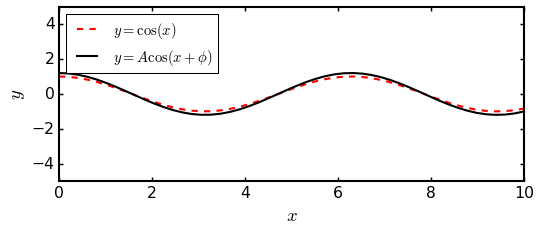

In [3]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display

def interact_cos_compare():
    ## Plot parameters
    xmin, xmax, nx = 0.0, 10.0, 50
    ymin, ymax     = -5.0, 5.0

    ## Set up the figure and the comparison plot of y=cos(x).
    fig = plt.figure(figsize=(8,3))
    x   = linspace(xmin, xmax, nx)
    y   = cos(x)
    plt.plot(x, y, color='r', linestyle='dashed', linewidth=2, label=r"$y=\cos(x)$")
    line, = plt.plot([], [], color='k', linewidth=2, label=r"$y=A \cos(x + \phi)$")

    ## Set up the figure axes, etc.
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc="upper left")
    plt.close()

    ## Callback function: plot y=Acos(x+phi)
    def plot_cos_compare(phi, A):
        y = A*cos(x+phi)
        line.set_data(x, y)
        display(fig)

    interact(plot_cos_compare,
             phi = FloatSlider(min=-3.2, max=3.2, step=0.2, value=0.0, description="phase"),
             A   = FloatSlider(min=-5.0, max=5.0, step=0.2, value=1.2, description="amplitude"))

interact_cos_compare();

## Other widget types

Sliders are not the only input widgets available. Your interactive figures can include many other kinds of user interface elements.  For a complete list, consult the [ipywidget documentation](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html). The following example shows the use of the `IntSlider` widget (similar to `FloatSlider` except that it returns integers), the `ToggleButton` widget (which selects between discrete choices), and the `FloatRangeSlider` widget (which selects a pair of floating-point numbers).

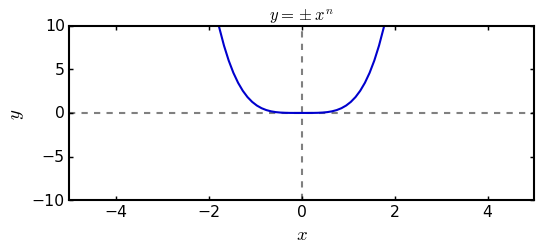

In [4]:
%matplotlib inline
from ipywidgets import interact, IntSlider, ToggleButtons, FloatRangeSlider
from numpy import linspace, exp, sign
import matplotlib.pyplot as plt
from IPython.display import display

def interact_polyn():
    ## Plot parameters
    xmin, xmax, nx = -5.0, 5.0, 100
    col0, col1     = "grey", "mediumblue"

    ## Set up the figure and the comparison plot of y=cos(x).
    fig = plt.figure(figsize=(8,3))
    ax  = fig.add_subplot(1, 1, 1)
    x   = linspace(xmin, xmax, nx)
    plt.plot([xmin, xmax], [0.0, 0.0], '--', color=col0) # guides to the eye
    line0, = plt.plot([], [], '--', color=col0)
    line1, = plt.plot([], [], color=col1, linewidth=2)

    ## Axis labels, etc.
    plt.title(r"$y = \pm x^n$")
    plt.xlim(xmin, xmax)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.close()

    ## Callback function: plot +/- x^n.
    def plot_polyn(n, sgn, yrange):
        s = 1. if sgn == '+' else -1.
        y = s * x**n
        line0.set_data([0.0, 0.0], yrange)
        line1.set_data(x, y)
        ax.set_ylim(yrange[0], yrange[1])
        display(fig)

    interact(plot_polyn,
             n      = IntSlider(min=0, max=10, value=1, description="n (power)"),
             sgn    = ToggleButtons(description='sign', options=['+', '-']),
             yrange = FloatRangeSlider(min=-50.,  max=50., step=0.5, value=[-10., 10.], description='y axis range'));

interact_polyn();

## 3D plots

Jupyter can also display 3D plots produced by Matplotlib.  To enable 3D plots, you must load the `Axes3D` object with the following import statement:

    from mpl_toolkits.mplot3d import Axes3D

The, you will be able to initialize a 3D figure by calling the [`add_subplot`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_subplot) function in the following way:

    ax = fig.add_subplot(1, 1, 1, projection='3d')

Within a 3D figure, you can plot individual curves in 3D by calling [`plt.plot`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) with $x$, $y$, and $z$ arrays, rather than just $x$ and $y$ arrays.

Plotting 2D surfaces in a 3D figure is a little more complicated.  The following example program shows how to plot the hyperboloid $x^2 + y^2 - z^2 = c^2$. The method is to parameterize and [triangulate](https://en.wikipedia.org/wiki/Triangulation_%28geometry%29) the surface.  Then, convert the parameterization into $x$, $y$, and $z$ coordinates, and call [plot_trisurf](http://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_trisurf), giving it the coordinates along with the the triangulation data.  For more information, see the [Matplotlib documentation on 3D plots](http://matplotlib.org/mpl_toolkits/mplot3d/api.html).

There are a couple of other minor things to point out in this program:

* In the first line, instead of the usual `%matplotlib inline` rendering method, we invoke `%matplotlib notebook`. This is an alternative rendering method which includes a nice toolbar for the figure. Also, for 3D plots, this rendering method allows the perspective to be adjusted by clicking and dragging.
* When invoking the `FloatSlider`, we supply the option `continuous_update=False`.  This tells Jupyter that we should wait for the user to finish dragging the slider before re-drawing the figure, rather than re-drawing continuously.  This is recommended if computing the figure is expensive.

<IPython.core.display.Javascript object>


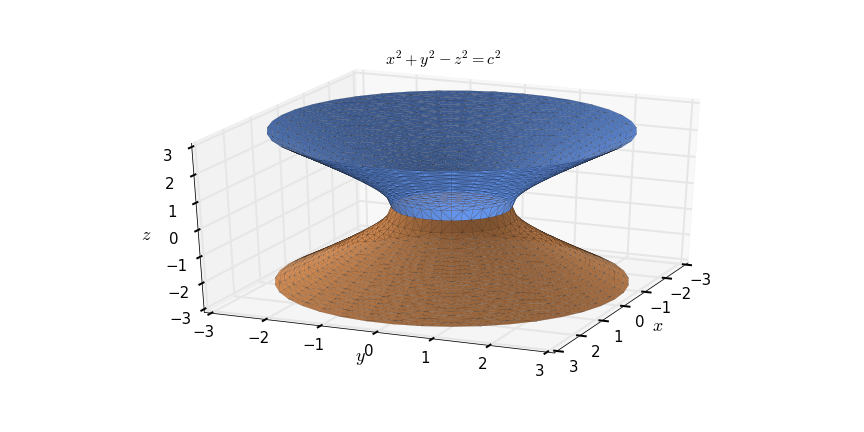

In [5]:
%matplotlib notebook
from scipy import *
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation
from IPython.display import display

def interact_hyperboloid():
    ## Parameters
    rmax, nr = 3.0, 25
    phimin, phimax, nphi = -pi, pi, 40
    camz, camera_angle = 10., 30.
    col1, col2 = "cornflowerblue", "sandybrown"

    ## Initialize numerical data for the hyperboloid.
    ## First, parameterize it using polar coordinates.
    r0vec   = linspace(0.0, 1.0, nr) # Unscaled radius
    phivec  = linspace(phimin, phimax, nphi)
    r0, phi = meshgrid(r0vec, phivec)
    r0, phi = r0.flatten(), phi.flatten()
    ## Note: we triangulate the polar coordinates.  The order
    ## is preserved, so this triangulation is usable for the
    ## Cartesian plot later.
    tri = Triangulation(r0, phi).triangles

    ## Set up the 3D plot.
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_xlim3d(-rmax, rmax)
    ax.set_ylim3d(-rmax, rmax)
    ax.set_zlim3d(-pi, pi)
    ax.view_init(elev=camz, azim=camera_angle)
    plt.close()

    def plot_hyperboloid(c):
        r = r0 * (rmax - c) + c
        x, y = r*cos(phi), r*sin(phi)
        z    = sqrt(x*x + y*y - c*c + 1e-9)
        ## Plot the hyperboloid.
        ax.clear()
        ax.plot_trisurf(x, y,  z, triangles=tri, linewidth=0.1, alpha=1.0, color=col1)
        ax.plot_trisurf(x, y, -z, triangles=tri, linewidth=0.1, alpha=1.0, color=col2)
        ## Set plot axes, etc.
        ax.set_title(r"$x^2 + y^2 - z^2 = c^2$")
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_zlabel(r'$z$')
        display(fig)
        
    interact(plot_hyperboloid,
             c = FloatSlider(min=0., max=2., step=0.1, value=1.0,
                             continuous_update=False, description='Waist radius'))

interact_hyperboloid();

## Plotting HTML5 animations

You can also plot animated figures. This is accomplished using the `matplotlib` module's ability to render animations in HTML5 video, which can be played by the web browser.  An example, showing the animation of a damped harmonic oscillator, is given below. The key steps in the program are:

* Import the `animation` submodule of Matplotlib.  Also, load the [`rc`](http://matplotlib.org/users/customizing.html#dynamic-rc-settings) function, which is for customizing Matplotlib settings; call it to enable HTML5 video output for Matplotlib animations.
* The last line of the program needs to print (output) an animation object, which will have the form of a HTML5 video.  In this example, this is achieved by defining a function named `oscillation_animation`, which returns the desired animation object, and calling `oscillation_animation` on the final line.
* To create the desired animation object, we must call [`animation.FuncAnimation`](http://matplotlib.org/api/animation_api.html#matplotlib.animation.FuncAnimation).  That asks for several inputs, detailing all the information needed to define the animation: what figure to plot in, how to update each animation frame (via a callback function called the **animation function**), how to clear an animation frame (via another callback function, the **animation initialization function**), the number of animation frames, and the time interval between animation frames. So we also need to define all these things.
* The static parts of the figure will be plotted by calling functions from `matplotlib.pyplot`, in the usual way. As before, we retain the figure object returned by [`plt.figure`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure), by assigning it to a variable. This figure object will be passed to [`animation.FuncAnimation`](http://matplotlib.org/api/animation_api.html#matplotlib.animation.FuncAnimation) to tell it where to draw the animation.
* For each curve that we want to animate, we first create a plot for empty data, and hang on to the resulting line object(s) returned by [`plt.plot`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).
* Define the animation function, which calls the [`set_data`](http://matplotlib.org/api/lines_api.html) method of the line object(s) with the desired x/y plot data. Similarly, define the animation initialization function. These two functions are then supplied to [`animation.FuncAnimation`](http://matplotlib.org/api/animation_api.html#matplotlib.animation.FuncAnimation), as mentioned above.

And that's it! We now have a spiffy animated figure.

In [6]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

## Enable HTML5 video output.
from matplotlib import animation, rc
rc('animation', html='html5')

def animate_oscillation():
    amplitude, gamma, omega0 = 1.0, 0.1, 1.0 # Oscillator parameters
    tmin, tmax, nt = 0., 50., 200            # Animation parameters
    nframes, frame_dt = 100, 40
    tmin_plt, xlim = -5, 1.2                 # Axis limits
    circ_pos = -2

    ## Set up the drawing area
    fig = plt.figure(figsize=(8,4))
    plt.xlim(tmin_plt, tmax)
    plt.ylim(-xlim, xlim)

    ## Draw the static parts of the figure
    t = linspace(tmin, tmax, nt)
    x = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
    plt.plot(t, x, color='blue', linewidth=2)
    plt.title('Motion of a damped harmonic oscillator.')
    plt.xlabel('t')
    plt.ylabel('x')

    ## Initialize the plot objects to be animated (`line', `circ', `dash')
    ## with empty plot data.  They'll be used by the `animate` subroutine.
    line, = plt.plot([], [], color='grey', linewidth=2)
    circ, = plt.plot([], [], 'o', color='red', markersize=15)
    dash, = plt.plot([], [], '--', color='grey', markersize=15)
    plt.close()

    ## Initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        circ.set_data([], [])
        dash.set_data([], [])
        return line, circ, dash

    ## Animation function. This is called sequentially for different
    ## integer n, running from 0 to nframes-1 (inclusive).
    def animate(n):
        t = tmin + (tmax-tmin)*n/nframes
        line.set_data([t, t], [-xlim, xlim])        
        xc = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
        circ.set_data(circ_pos, xc)
        dash.set_data([circ_pos, t], [xc, xc])
        return line, circ, dash

    # Call the animator. blit=True means only re-draw the parts that have changed.
    animator = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=nframes, interval=frame_dt, blit=True)
    return animator

animate_oscillation()

As an excercise, try writing code for animating a traveling wave:

$$f(x,t) = \cos(kx - \omega t).$$

You can pick an arbitrary value of $k$ and $\omega$.  In each animation frame, we need to plot $f$ versus $x$.  Let there be $N$ animation frames, spread over one wave period $T = 2 \pi/\omega$.  Hence, frame $n \in \{0, 1, \dots, N-1\}$ occurs at time

$$t_n = \frac{2\pi n}{\omega N}.$$

We therefore have to plot

$$f(x,t_n) = \cos(kx - \omega t_n), \;\;\; \mathrm{where}\;\; t_n = \frac{2\pi n}{\omega N}.$$

As an extension, try implementing widgets for interactively specifying the values of $k$ and $\omega$!

In [ ]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

## Enable HTML5 video output.
from matplotlib import animation, rc
rc('animation', html='html5')

def animate_wave():
    ## Set up parameters, the static parts of the figure, etc.
    
    ## Initialization function.
    def init():
        ; # Fill in code here

    ## Animation function.
    def animate(n):
        ## Fill in code for plotting f versus x at time t_n.
        ;

    # Call the animator.
    animator = animation.FuncAnimation() # Fill in code here
    return animator

animate_wave()